# Pairwise Relationships: Pairplot & PairGrid 

## Importing required libraries

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

## Loading the Data

In [2]:
df = pd.read_csv('Datasets/Admission_Predict.csv')

## Check the dimensions 

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.shape

(400, 9)

In [7]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

## Drop some columns

A DataFrame object has two axes: “axis 0” and “axis 1”. “axis 0” represents rows and “axis 1” represents columns.

When inplace = True , the data is modified in place, which means it will return nothing and the dataframe is now updated.

In [8]:
df.drop(['TOEFL Score', 'SOP', 'LOR ', 'University Rating'], axis=1, inplace = True) 

In [9]:
df.head()

,Serial No.,GRE Score,CGPA,Research,Chance of Admit
0,1,337,9.65,1,0.92
1,2,324,8.87,1,0.76
2,3,316,8.00,1,0.72
3,4,322,8.67,1,0.80
4,5,314,8.21,0,0.65


## Pair plot

Plot pairwise relationships in a dataset. 
A pairs plot allows us to see both distribution of single variables and relationships between two variables.
Pair plots are a great method to identify trends for follow-up analysis.

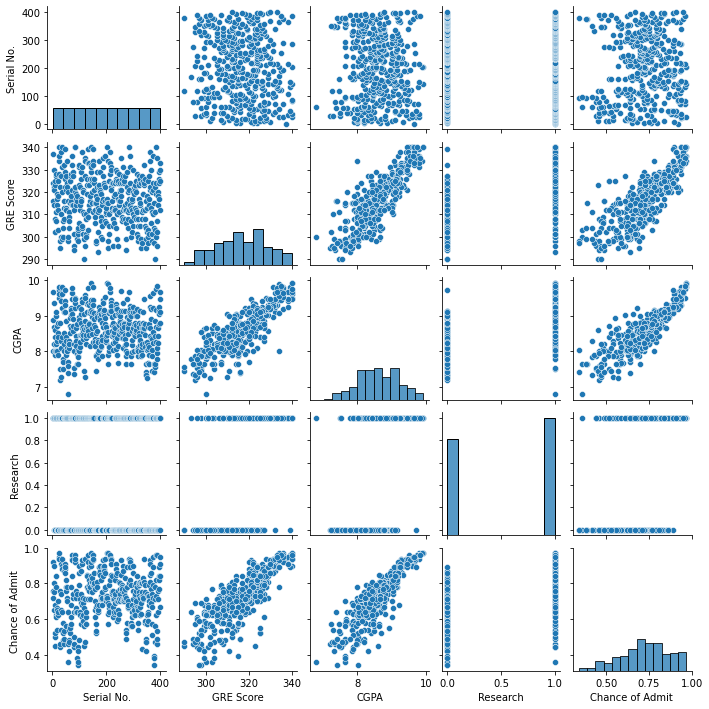

In [11]:
sns.pairplot(df, diag_kind = 'hist', height=2)

plt.show()

## Add kde

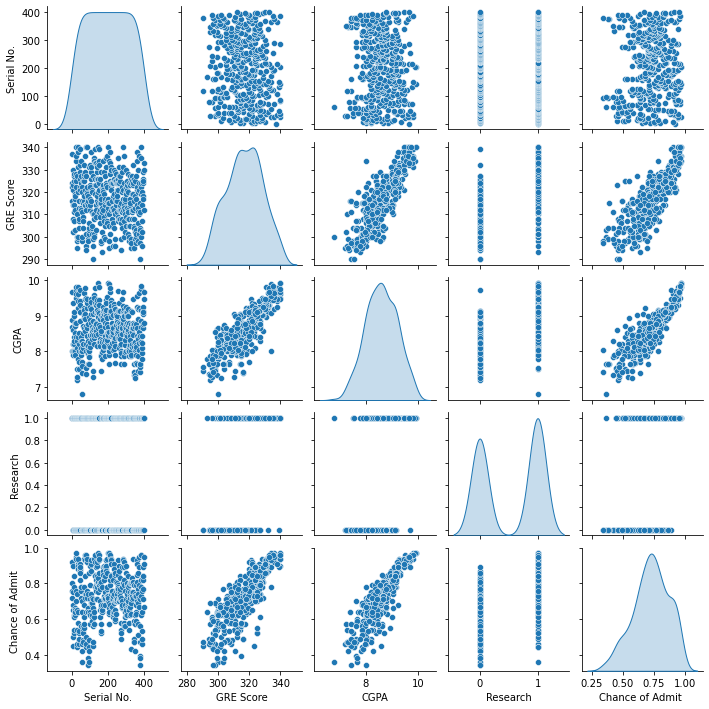

In [12]:
sns.pairplot(df, diag_kind = 'kde', height=2)

plt.show()

## Add a hue

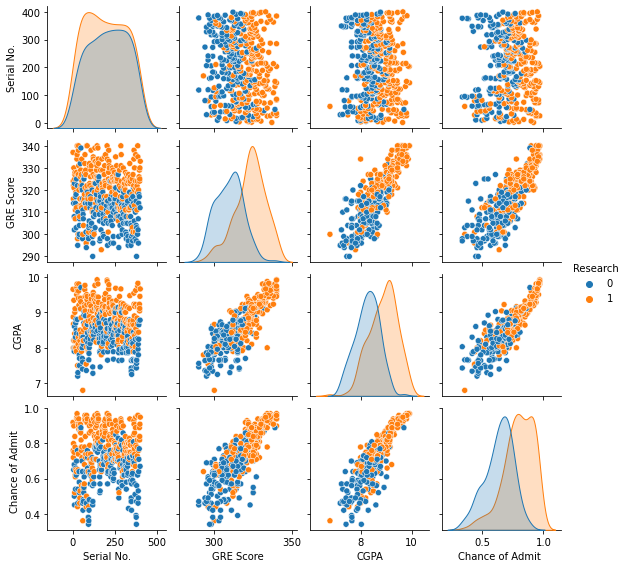

In [13]:
sns.pairplot(df, hue = 'Research', diag_kind = 'kde', height=2)

plt.show()

## Pair Grid

This object maps each variable in a dataset onto a column and row in a grid of multiple axes. Different axes-level plotting functions can be used to draw bivariate plots in the upper and lower triangles, and the the marginal distribution of each variable can be shown on the diagonal.

Several different common plots can be generated in a single line using pairplot(). Use PairGrid when you need more flexibility.

### Load some example data

In [3]:
penguins = sns.load_dataset("penguins")

penguins.sample()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
183,Chinstrap,Dream,54.2,20.8,201.0,4300.0,Male


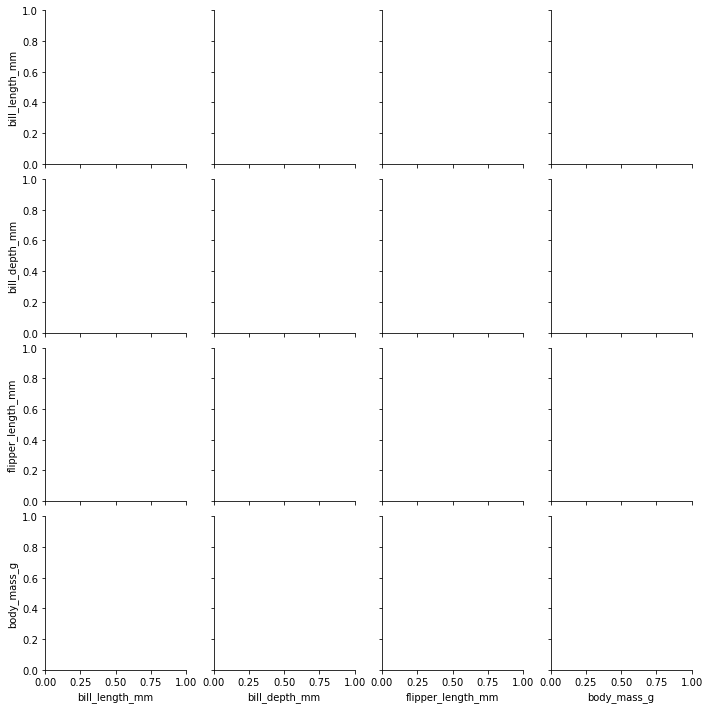

In [7]:
g = sns.PairGrid(penguins)

It’s also possible to use different functions on the upper and lower triangles of the plot (which are otherwise redundant):

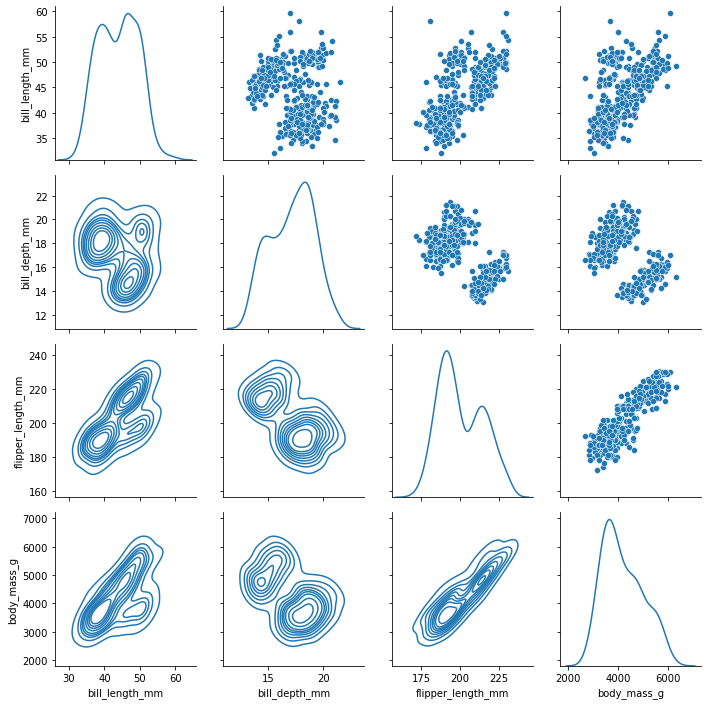

In [5]:
g = sns.PairGrid(penguins, diag_sharey=False)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot)

### Add hue

The PairGrid constructor accepts a hue variable. This variable is passed directly to functions that understand it:

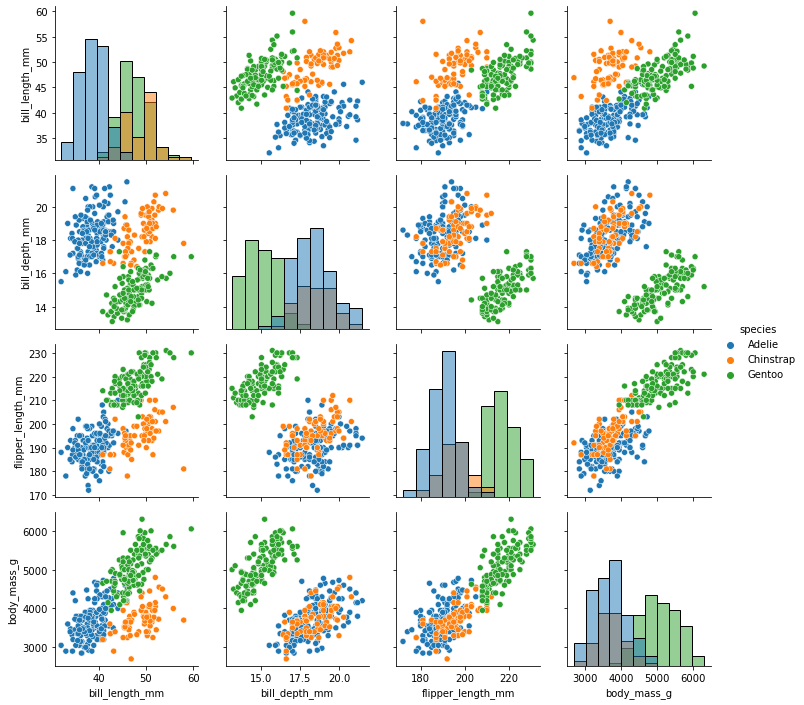

In [6]:
g = sns.PairGrid(penguins, hue="species")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()